# Start

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('AB_Test_Results.csv')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,10000.0,4981.080200,2890.590115,2.0,2468.75,4962.0,7511.5,10000.00
REVENUE,10000.0,0.099447,2.318529,0.0,0.00,0.0,0.0,196.01


In [5]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

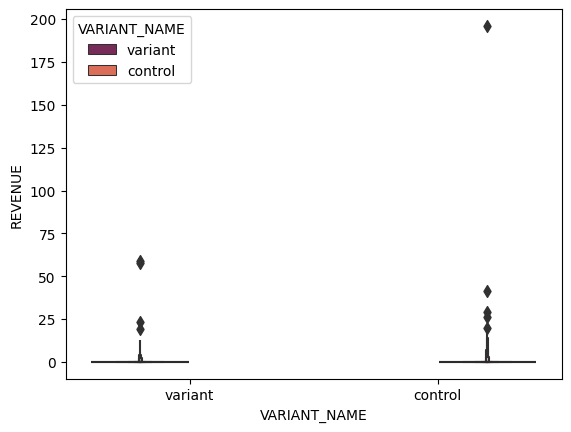

In [6]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

# Removing duplicates

We remove the users that are both Variant and Control.

In [7]:
# df[df.duplicated()]

In [8]:
# #  remove USER_ID who have two groups

# duplicates = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
# duplicates = duplicates[duplicates]

# # USER_ID_nunique data

# df = df[df["USER_ID"].isin(duplicates.index)]

In [9]:
df.groupby("USER_ID")["VARIANT_NAME"].nunique()

USER_ID
2        1
3        2
4        1
5        1
6        1
        ..
9993     1
9995     1
9996     2
9998     1
10000    2
Name: VARIANT_NAME, Length: 6324, dtype: int64

In [10]:
df['USER_ID'].value_counts()

USER_ID
5652    6
8359    6
668     6
9101    6
4879    6
       ..
5455    1
1399    1
6967    1
3156    1
9468    1
Name: count, Length: 6324, dtype: int64

In [11]:
print(df[df['USER_ID']==2])
print(df[df['USER_ID']==5652])
print(df[df['USER_ID']==9995])

      USER_ID VARIANT_NAME  REVENUE
2406        2      control      0.0
3479        2      control      0.0
7076        2      control      0.0
      USER_ID VARIANT_NAME  REVENUE
595      5652      control      0.0
778      5652      control      0.0
2880     5652      control      0.0
6327     5652      control      0.0
7248     5652      control      0.0
7972     5652      control      0.0
      USER_ID VARIANT_NAME  REVENUE
2749     9995      variant      0.0
5673     9995      variant      0.0


In [12]:
# df.drop_duplicates(inplace=True)

In [13]:
# rows_to_keep = df['USER_ID'].value_counts()==1
# rows_to_keep = rows_to_keep[rows_to_keep]
# df = df[df['USER_ID'].isin(rows_to_keep.index)]

rows_to_keep = (df.groupby("USER_ID")["VARIANT_NAME"].nunique() == 1)
rows_to_keep = rows_to_keep[rows_to_keep]
df = df[df['USER_ID'].isin(rows_to_keep.index)]

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,6070.0,4983.664086,2897.990118,2.0,2472.25,4950.0,7501.0,9998.00
REVENUE,6070.0,0.107064,2.673501,0.0,0.00,0.0,0.0,196.01


In [15]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    3044
control    3026
Name: count, dtype: int64

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

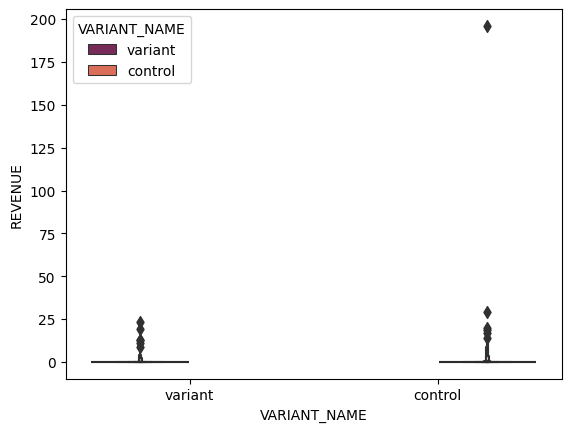

In [16]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

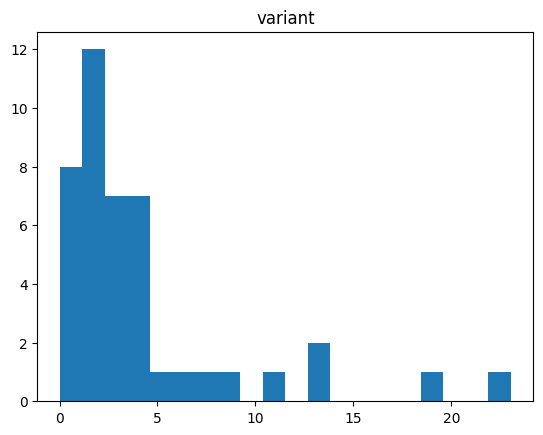

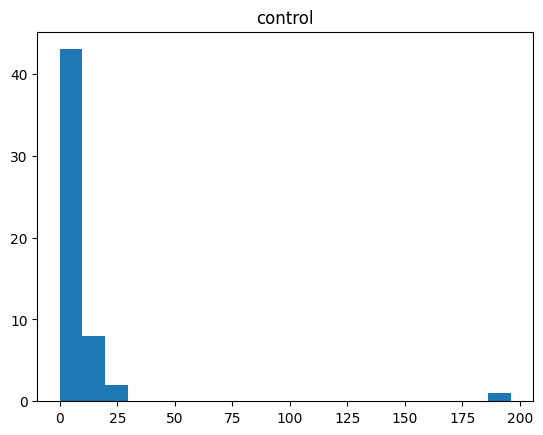

In [17]:
plt.hist(df[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('variant')
plt.show()

plt.hist(df[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('control')
plt.show()

# Removing outliers

In [18]:
# index_to_drop = df[(df['REVENUE'] >= 10) & (df['VARIANT_NAME'] == 'variant')].index
# df.drop(index=index_to_drop, inplace= True)
index_to_drop =  df[(df['REVENUE'] >= 25)].index
df.drop(index=index_to_drop, inplace= True)

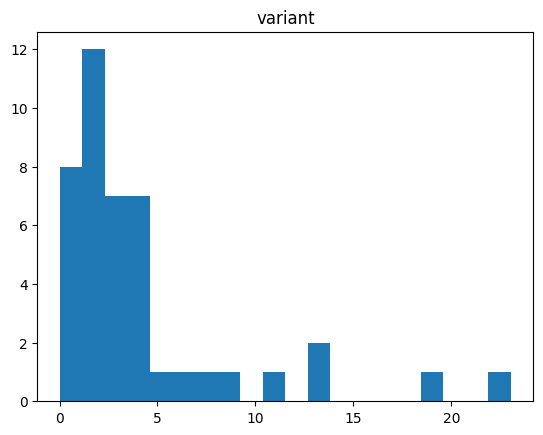

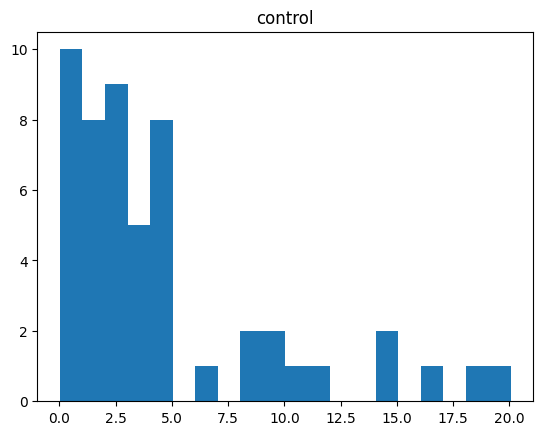

In [19]:
plt.hist(df[(df['VARIANT_NAME'] == 'variant') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('variant')
plt.show()

plt.hist(df[(df['VARIANT_NAME'] == 'control') & (df['REVENUE'] != 0)]['REVENUE'], bins =20)
plt.title('control')
plt.show()

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

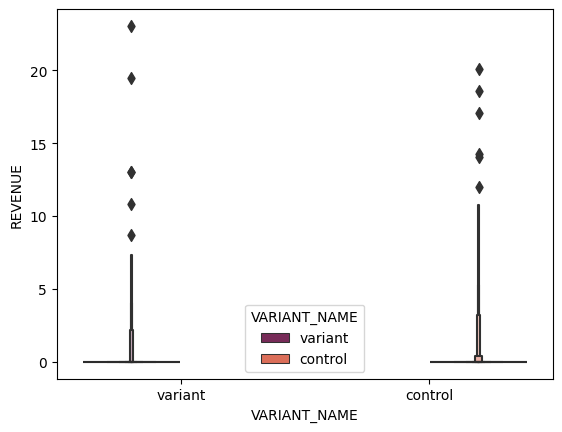

In [20]:
sns.boxenplot(
  df[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

In [21]:
df['BOUGHT'] = np.where(df['REVENUE'] == 0, 0, 1)

In [22]:
df['BOUGHT'].value_counts()

BOUGHT
0    5973
1      95
Name: count, dtype: int64

In [23]:
df.groupby(['VARIANT_NAME', 'BOUGHT'])['BOUGHT'].count()

VARIANT_NAME  BOUGHT
control       0         2972
              1           52
variant       0         3001
              1           43
Name: BOUGHT, dtype: int64

In [24]:
df.reset_index(drop=True, inplace=True)

# New dataframes

In [25]:
df_userid_revenue = pd.DataFrame(df.groupby(['USER_ID', 'VARIANT_NAME'])['REVENUE'].sum()).reset_index()
df_userid_revenue

,USER_ID,VARIANT_NAME,REVENUE
0,2,control,0.0
1,4,variant,0.0
2,5,variant,0.0
3,6,variant,0.0
4,9,variant,0.0
...,...,...,...
4777,9990,variant,0.0
4778,9992,control,0.0
4779,9993,control,0.0
4780,9995,variant,0.0


In [26]:
df_userid_interaction = df[['USER_ID', 'VARIANT_NAME', 'REVENUE']].groupby(['USER_ID', 'VARIANT_NAME']).agg(INTERACTIONS=('REVENUE', 'count')).reset_index()
# df_userid_interaction = df[['USER_ID', 'VARIANT_NAME', 'REVENUE']].groupby(['USER_ID', 'VARIANT_NAME']).count().reset_index()
# df_userid_interaction.rename(columns={'REVENUE': 'INTERACTIONS'}, inplace=True)
df_userid_interaction

,USER_ID,VARIANT_NAME,INTERACTIONS
0,2,control,3
1,4,variant,1
2,5,variant,1
3,6,variant,1
4,9,variant,1
...,...,...,...
4777,9990,variant,1
4778,9992,control,1
4779,9993,control,1
4780,9995,variant,2


In [27]:
df_userid_bought = df[['USER_ID', 'VARIANT_NAME', 'BOUGHT']].groupby(['USER_ID', 'VARIANT_NAME']).agg(TOTAL_BOUGHTS=('BOUGHT', 'sum')).reset_index()
df_userid_bought

,USER_ID,VARIANT_NAME,TOTAL_BOUGHTS
0,2,control,0
1,4,variant,0
2,5,variant,0
3,6,variant,0
4,9,variant,0
...,...,...,...
4777,9990,variant,0
4778,9992,control,0
4779,9993,control,0
4780,9995,variant,0


In [28]:
# pd.concat([df_userid_revenue, df_userid_interaction, df_userid_bought], axis=1)
df_grouped_users = pd.merge(df_userid_revenue, df_userid_interaction, on=['USER_ID', 'VARIANT_NAME']).merge(df_userid_bought, on=['USER_ID', 'VARIANT_NAME'])
df_grouped_users

,USER_ID,VARIANT_NAME,REVENUE,INTERACTIONS,TOTAL_BOUGHTS
0,2,control,0.0,3,0
1,4,variant,0.0,1,0
2,5,variant,0.0,1,0
3,6,variant,0.0,1,0
4,9,variant,0.0,1,0
...,...,...,...,...,...
4777,9990,variant,0.0,1,0
4778,9992,control,0.0,1,0
4779,9993,control,0.0,1,0
4780,9995,variant,0.0,2,0


In [29]:
# df_grouped_users['CONVERTION_RATE'] = df_grouped_users['TOTAL_BOUGHTS'] / df_grouped_users['INTERACTIONS']
df_grouped_users['NO_BOUGHTS'] = df_grouped_users['INTERACTIONS'] - df_grouped_users['TOTAL_BOUGHTS']
df_grouped_users['BOUGHT'] = np.where(df_grouped_users['REVENUE'] == 0, 0, 1)
df_grouped_users

,USER_ID,VARIANT_NAME,REVENUE,INTERACTIONS,TOTAL_BOUGHTS,CONVERTION_RATE,NO_BOUGHTS,BOUGHT
0,2,control,0.0,3,0,0.0,3,0
1,4,variant,0.0,1,0,0.0,1,0
2,5,variant,0.0,1,0,0.0,1,0
3,6,variant,0.0,1,0,0.0,1,0
4,9,variant,0.0,1,0,0.0,1,0
...,...,...,...,...,...,...,...,...
4777,9990,variant,0.0,1,0,0.0,1,0
4778,9992,control,0.0,1,0,0.0,1,0
4779,9993,control,0.0,1,0,0.0,1,0
4780,9995,variant,0.0,2,0,0.0,2,0


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

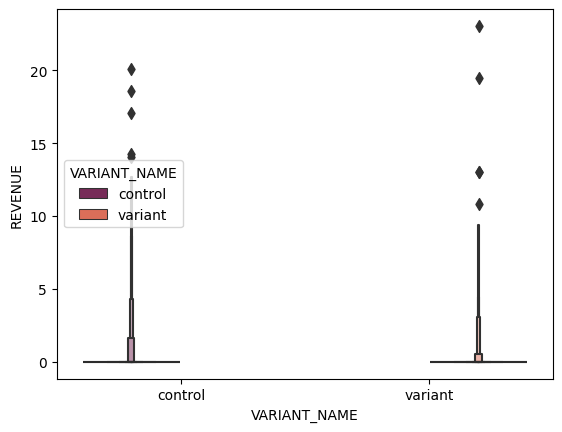

In [30]:
sns.boxenplot(
  df_grouped_users[['VARIANT_NAME', 'REVENUE']], 
  x = "VARIANT_NAME",
  y = 'REVENUE',
  hue="VARIANT_NAME", 
  palette='rocket'
)

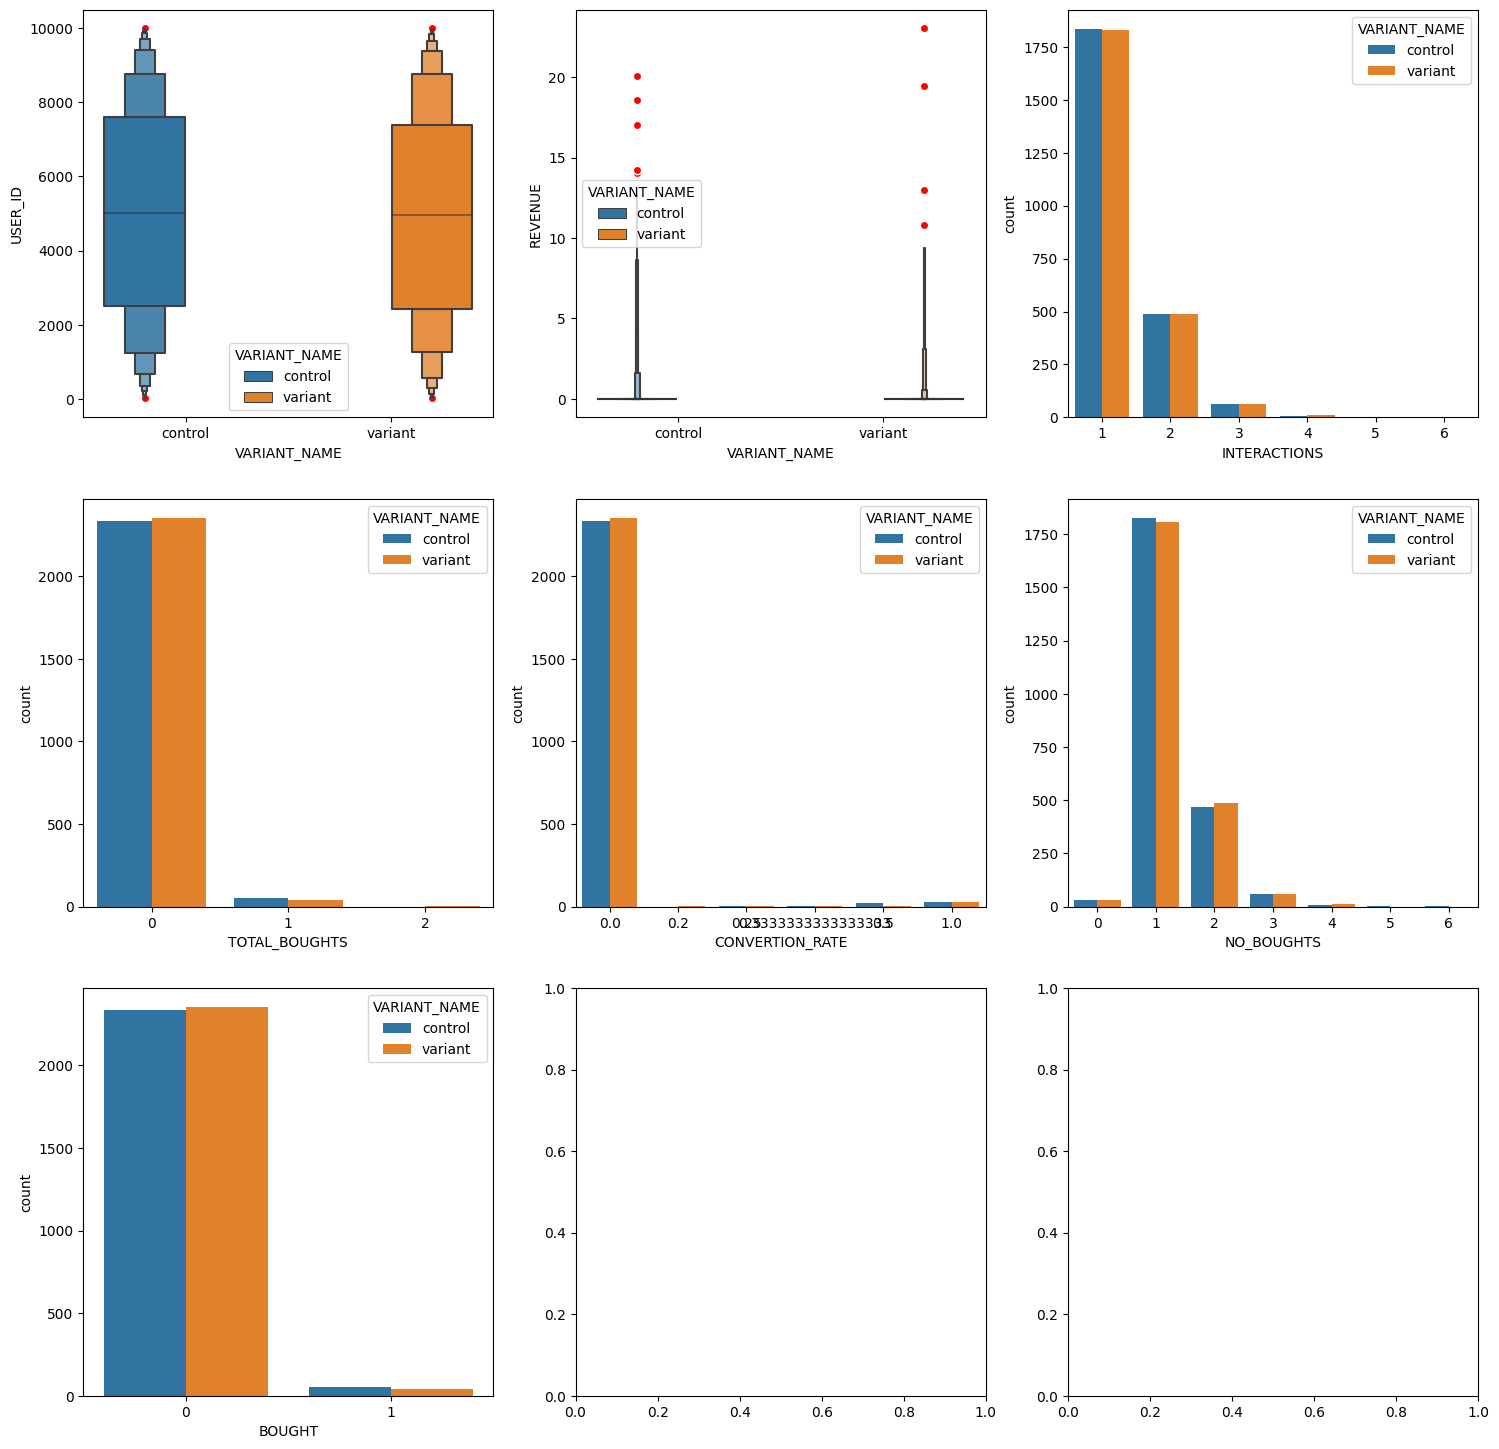

In [31]:
df_grouped_users_num = df_grouped_users.select_dtypes(include='number')
n_cols =  3
red_circle_boxen = dict(color='red', marker='o', edgecolors='white')
# n_rows = int(np.ceil(((df_grouped_users_num.shape[1]-1) / n_cols)))
n_rows = int(np.ceil(((df_grouped_users_num.shape[1]) / n_cols)))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(18, (n_rows*6)))
for i, column in enumerate(df_grouped_users_num.columns):
  if(len(df_grouped_users_num[column].unique()) <= 24): # "categorical" data
    sns.countplot(
      df_grouped_users[[column, 'VARIANT_NAME']],
      x = column,
      hue="VARIANT_NAME", 
      ax=axes[i//n_cols,i%n_cols],
    )
  else: # if it's not categorical data...

    sns.boxenplot(
      df_grouped_users[[column, 'VARIANT_NAME']],
      x = "VARIANT_NAME",
      hue="VARIANT_NAME", 
      y = column,
      ax=axes[i//n_cols,i%n_cols],
      flier_kws=red_circle_boxen
    )

The graphs allow us to suspect that there is no difference between Variant and Control among the different variables.

# A/B Testing

General assumptions:
- Randomness: The samples are random subsets of larger population
- Independence of observations: Each observation is independent
- Large sample size: The sample is big enough to mitigate uncertainty, so that the Central Limit Theorem applies

Test assumptions:

- T-test for difference in means:
    - Large sample size: 
    
        - At least 30 observations in each sample. 
        
            n1 >= 30, n2 >= 30

- Mann-Whitney U rank test:
    - The data must be independent.

    - The data must be ordinal or capable of being ordered from least to greatest.

    - It is not necessary to assume that the samples are normally distributed or that they come from normal populations. However, for the test to compare medians, both samples must have the same type of distribution (variance, skewness, etc.).

Equality of variance between groups (homoscedasticity).
- Permutation test for difference in means
- Levene test for equal variances between samples
- Z-test for proportions:
    - Large sample size: 

        - Number of successes in each sample is equal or greater than 10

            n1 * p_hat1 >= 10
            n2 * p_hat2 >= 10
            
        - Number of failures in each sample is equal or greater than 10
        
            n1 * (1-p_hat1) >= 10
            n2 * (1-p_hat2) >= 10

- Permutation test for proportions
- Chi-Square test of Independence:
    - Large sample size:

        - The number of successes in each group is equal or greater than 5

            ni * p_hat_i >= 5 for all values of i

        - The number of failures in each group is equal or greater than 5

            ni * (1-p_hat_i) >= 5 for all values of i

- Fisher's Exact test

## A/B Testing on Revenue

In [81]:
mean_control = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'].mean()
mean_variant = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'].mean()
print(f'mean_control: {mean_control:.4f}')
print(f'mean_variant: {mean_variant:.4f}')
print(f'mean_control - mean_variant: {mean_control - mean_variant:.4f}')

mean_control: 0.1026
mean_variant: 0.0749
mean_control - mean_variant: 0.0277


Based on the calculations for the mean of each group, we make the hyphotesis that the variant group generates less revenue than the control group on average.

H0 = No difference on revenue. (mean_control - mean_variant = 0)

H1 = Variant group generates less revenue / Difference between control and variant is positive. (mean_control - mean_variant > 0)

### Permutation test

Permutation test's p-value: 0.1523


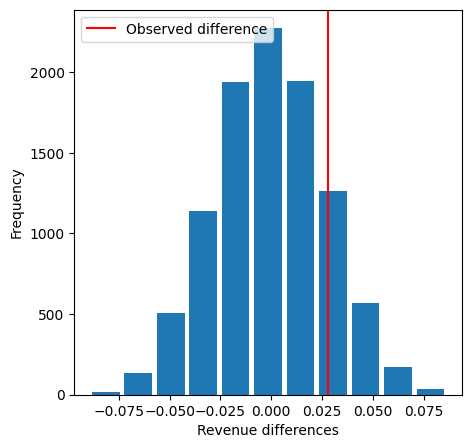

In [87]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

permutation_results = stats.permutation_test(
    (df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
     df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']),
     statistic,
     vectorized=True,
     alternative='greater'
    )
print(f'Permutation test\'s p-value: {permutation_results.pvalue}')

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(permutation_results.null_distribution, bins=11, rwidth=0.85)
ax.axvline(x = mean_control - mean_variant, color='red', label='Observed difference')
ax.set_xlabel('Revenue differences')
ax.set_ylabel('Frequency')

ax.legend();
plt.show()

### t-Test

#### Levene test (for equal variances)

Determining if the variances of the samples are equal will help us decide which test are appropriate for the t-test. If variances are equal, a standard  independent 2 sample t-test should be performed, otherwise, Welch’s t-test should be performed.

In [35]:
stat, p = stats.levene(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'],
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']
)
print(stat, p)

1.0613290873416377 0.3029643704990575


With a p value of 0.30 we failed to reject the null hypothesis that the samples are from populations with equal variances. We will perform a standard independet t-test.

In [91]:
# df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE']
# df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE']

ttest_results = stats.ttest_ind(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'],
    equal_var=True,
    alternative='greater'
)
print(f'p-value for single sided test: {ttest_results.pvalue}')

p-value for single sided test: 0.15148218524965731


### Mann-Whitney U rank test

Sometimes is ambiguous to correctly know when the condition of normality is met to perform a t-test, as there are situations where the samples are big enough but at the same time are extremely skewed to apply the central limit theorem. The data we have is a reflect of that situation. For such cases, it is convenient to perform non-parametric test. We will use the Mann-Whitney U rank test for this purpose.

In [93]:
mannwhitneyu_results = stats.mannwhitneyu(
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['REVENUE'], 
    df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['REVENUE'],
    alternative='greater'
)
print(f'p-value: {mannwhitneyu_results.pvalue}')

p-value: 0.14567423499143128


## A/B Testing on Boughts (Proportions)

In [38]:
df_contingency_pt1 = df_grouped_users.loc[(df_grouped_users['BOUGHT'] == 0), ['BOUGHT', 'VARIANT_NAME']].groupby('VARIANT_NAME').count()
df_contingency_pt1.rename(columns={'BOUGHT': 'NO_BOUGHT'}, inplace=True)

In [39]:
df_contingency_pt2 = df_grouped_users[['BOUGHT', 'VARIANT_NAME']].groupby('VARIANT_NAME').sum()

In [40]:
df_contingency = pd.concat([df_contingency_pt1, df_contingency_pt2], axis=1)
df_contingency

,NO_BOUGHT,BOUGHT
VARIANT_NAME,,
control,2337,52
variant,2351,42


In [41]:
# df_contingency = df_grouped_users[['BOUGHTS', 'NO_BOUGHTS', 'VARIANT_NAME']].groupby('VARIANT_NAME').sum()
# df_contingency

In [42]:
df_contingency.loc['control', 'BOUGHT']
df_contingency.loc['control'].sum()

2389

In [43]:
df_contingency['NO_BOUGHT'].sum()

4688

In [44]:
conversion = [0] * df_contingency['NO_BOUGHT'].sum()
conversion.extend([1] * df_contingency['BOUGHT'].sum())
conversion = pd.Series(conversion)

In [45]:
observed_difference = df_contingency.loc['control', 'BOUGHT'] / df_contingency.loc['control'].sum() - df_contingency.loc['variant', 'BOUGHT'] / df_contingency.loc['variant'].sum()

conversion = [0] * df_contingency['NO_BOUGHT'].sum()
conversion.extend([1] * df_contingency['BOUGHT'].sum())
conversion = pd.Series(conversion)

In [46]:
observed_difference

0.0042152384947236055

### Permutation test

In [47]:
def permutation_test_proportions(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    # n = nA + nB
    # idx_B = set(random.sample(range(n), nB))
    # idx_A = set(range(n)) - idx_B
    # # print(f'den_a: {x.loc[list(idx_A)].sum()}')
    # # print(f'nA: {nA}')
    # # print(f'den_b: {x.loc[list(idx_B)].sum()}')
    # # print(f'nB: {nB}')
    # # print(f'------------------------------------')
    # return (x.loc[list(idx_A)].sum() / nA) - (x.loc[list(idx_B)].sum() / nB)


In [48]:
df_contingency.loc['variant'].sum()

2393

Observed difference: 0.4215%


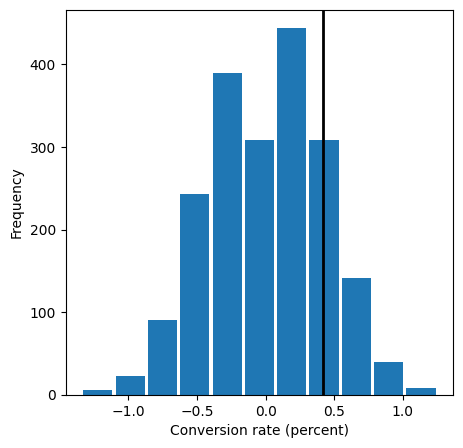

In [49]:
#copia
# VARIANT_NAME  BOUGHT
# variant       0         2351
# control       0         2337
#               1           52
# variant       1           42
# random.seed(1)

observed_difference = df_contingency.loc['control', 'BOUGHT'] / df_contingency.loc['control'].sum() - df_contingency.loc['variant', 'BOUGHT'] / df_contingency.loc['variant'].sum()
obs_pct_diff = 100 * observed_difference
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * df_contingency['NO_BOUGHT'].sum()
conversion.extend([1] * df_contingency['BOUGHT'].sum())
conversion = pd.Series(conversion)

perm_diffs = [100 * permutation_test_proportions(conversion, df_contingency.loc['control'].sum(), df_contingency.loc['variant'].sum()) 
              for _ in range(2000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
# ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

# plt.tight_layout()
plt.show()

In [50]:
perm_diffs = np.array(perm_diffs)
print(np.mean([abs(diff) > obs_pct_diff for diff in perm_diffs]))

0.2645


Other permutation test implementation

In [51]:
def permutations_2(x1, x2, statistic_fun, n_iter=1000):
    
    n_x1 = len(x1)
    n_x2 = len(x2)
    pool_data = np.hstack((x1, x2))
    
    results_permutations = np.full(shape=n_iter, fill_value=np.nan)
    
    for i in range(n_iter):
        np.random.shuffle(pool_data)
        statistic = statistic_fun(pool_data[:n_x1], pool_data[n_x1:])
        results_permutations[i] = statistic
        
    return results_permutations

In [52]:
def dif_proporciones(x1, x2):
    
    # La media de un vector boleano es la proporción de Trues
    estadistico = np.mean(x1) - np.mean(x2)
    return(estadistico)

In [53]:
dif_observada = dif_proporciones(
                    x1 = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['BOUGHT'],
                    x2 = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['BOUGHT']
                )
print(f"Diferencia observada: {dif_observada}")

Diferencia observada: -0.0042152384947236055


In [54]:
dist_permut = permutations_2(
                x1 = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['BOUGHT'],
                x2 = df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['BOUGHT'],
                statistic_fun = dif_proporciones,
                n_iter   = 9000
              )

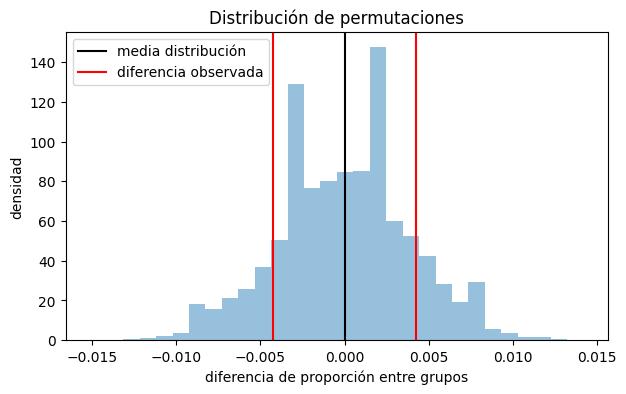

In [55]:
# Distribución de permutaciones
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,4))
ax.hist(dist_permut, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.axvline(x=dist_permut.mean(), color='black', label='media distribución')
ax.axvline(x=dif_observada, color='red', label='diferencia observada')
ax.axvline(x=-dif_observada, color='red')

ax.set_title('Distribución de permutaciones')
ax.set_xlabel('diferencia de proporción entre grupos')
ax.set_ylabel('densidad')
ax.legend();

In [56]:
p_value = (sum(np.abs(dist_permut) > np.abs(dif_observada)))/len(dist_permut)
p_value_correc = (sum(np.abs(dist_permut) > np.abs(dif_observada)) + 1)/len(dist_permut + 1)
print(f"p-value sin corrección: {p_value}")
print(f"p-value con corrección: {p_value_correc}")

p-value sin corrección: 0.25177777777777777
p-value con corrección: 0.2518888888888889


Scipy's permutation test

In [57]:
df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['BOUGHT'].sum()

42

In [58]:
# def statistic(x, y, axis):
#     prop_x = np.sum(x, axis=axis) / len(x.T)
#     prop_y = np.sum(y, axis=axis) / len(y.T)
#     diff_prop = prop_x - prop_y
    
#     return diff_prop

def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)
res = stats.permutation_test(
    (df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'variant']['BOUGHT'], df_grouped_users[df_grouped_users['VARIANT_NAME'] == 'control']['BOUGHT']),
     statistic,
     vectorized=True,
     n_resamples=9000

    )
res

PermutationTestResult(statistic=-0.0042152384947236055, pvalue=0.35040551049883345, null_distribution=array([ 1.64005628e-03, -3.28850874e-05,  4.14946832e-03, ...,
        2.47652696e-03,  8.03585594e-04, -5.05170918e-03]))

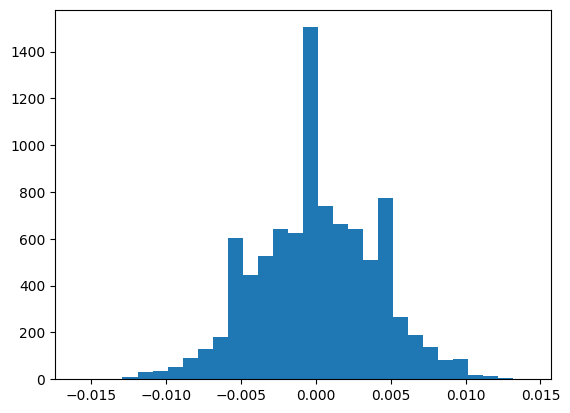

In [59]:
plt.hist(res.null_distribution, bins =30)
plt.show()

### z-test

In [60]:
n_boughts = df_contingency['BOUGHT'].values
n_rows = np.array(df_contingency.sum(axis=1)['control'], df_contingency.sum(axis=1)['variant'])

In [61]:
z_score, p_value = proportions_ztest(count=n_boughts, nobs=n_rows, alternative='two-sided')

In [62]:
z_score, p_value 

(1.0417192814567282, 0.2975418468836222)

### Chi-Square

In [63]:
df_contingency

,NO_BOUGHT,BOUGHT
VARIANT_NAME,,
control,2337,52
variant,2351,42


In [64]:
df_contingency.mean()['BOUGHT']

47.0

In [65]:
df_contingency.sum()['BOUGHT']

94

In [66]:

df_contingency.sum(axis=1)['control']

2389

In [67]:
df_contingency.T

VARIANT_NAME,control,variant
NO_BOUGHT,2337,2351
BOUGHT,52,42


In [68]:
ratio_boughts = df_contingency.sum()['BOUGHT'] / df_contingency.sum().sum()
expected_boughts_control = ratio_boughts * df_contingency.sum(axis=1)['control']
expected_boughts_variant = ratio_boughts * df_contingency.sum(axis=1)['variant']
expected_noboughts_control = df_contingency.sum(axis=1)['control'] - expected_boughts_control
expected_noboughts_variant = df_contingency.sum(axis=1)['variant'] - expected_boughts_variant
expected_boughts = np.array([expected_boughts_control, expected_boughts_variant])
expected_noboughts = np.array([expected_noboughts_control, expected_noboughts_variant])
expected = [expected_boughts, expected_noboughts]
expected

[array([46.96068591, 47.03931409]), array([2342.03931409, 2345.96068591])]

In [69]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_contingency)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'df: {df}')
print(f'expected: {expected}')

Observed chi2: 0.8944
p-value: 0.3443
df: 1
expected: [[2342.03931409   46.96068591]
 [2345.96068591   47.03931409]]


In [70]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_contingency.T)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'df: {df}')
print(f'expected: {expected}')

Observed chi2: 0.8944
p-value: 0.3443
df: 1
expected: [[2342.03931409 2345.96068591]
 [  46.96068591   47.03931409]]


In [71]:
df_contingency

,NO_BOUGHT,BOUGHT
VARIANT_NAME,,
control,2337,52
variant,2351,42


In [72]:
boughts = np.array([[52, 2337], [42, 2351]])
chisq, pvalue, df, expected = stats.chi2_contingency(boughts)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')
print(f'df: {df}')
print(f'expected: {expected}')

Observed chi2: 0.8944
p-value: 0.3443
df: 1
expected: [[  46.96068591 2342.03931409]
 [  47.03931409 2345.96068591]]


In [73]:
boughts

array([[  52, 2337],
       [  42, 2351]])

### Fisher's Exact Test

In [74]:
df_contingency

,NO_BOUGHT,BOUGHT
VARIANT_NAME,,
control,2337,52
variant,2351,42


In [75]:
odds_ratio, p_value = stats.fisher_exact(df_contingency)
p_value

0.29973297470952087